# Task No 1

✅ Dataset downloaded to: C:\Users\Sameer\.cache\kagglehub\datasets\uciml\sms-spam-collection-dataset\versions\1
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

📊 Spam Detection Evaluation:
              precision    recall  f1-score   support

           0      0.963     1.000     0.981       965
           1      1.000     0.753     0.859       150

    accuracy                          0.967      1115
   macro avg      0.982     0.877     0.920      1115
weighted avg      0.968     0.967     0.965      1115



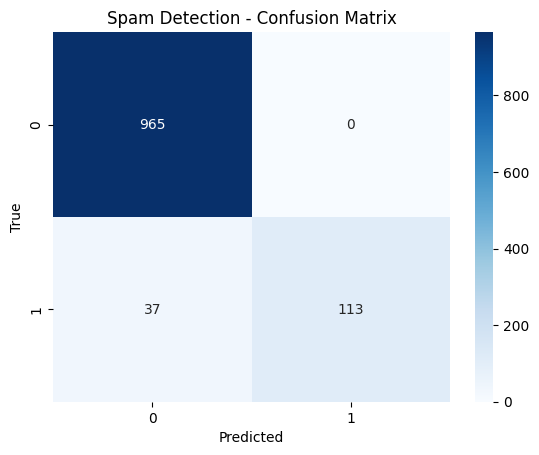

Input: Congratulations! You have won $1000. → Spam
Input: Let’s meet for lunch tomorrow. → Not Spam


In [1]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------------
# Step 1: Download Dataset
# -------------------------------
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
print("✅ Dataset downloaded to:", path)

# Load dataset
df = pd.read_csv(os.path.join(path, "spam.csv"), encoding="latin-1")
df = df[['v1', 'v2']]
df.columns = ['label', 'message']
print(df.head())

# -------------------------------
# Step 2: Preprocess Data
# -------------------------------
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label'], test_size=0.2, random_state=42
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english", lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# -------------------------------
# Step 3: Train Model
# -------------------------------
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# -------------------------------
# Step 4: Evaluation
# -------------------------------
y_pred = model.predict(X_test_tfidf)
print("\n📊 Spam Detection Evaluation:")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Spam Detection - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# Step 5: User Input Test
# -------------------------------
sample_messages = [
    "Congratulations! You have won $1000.",
    "Let’s meet for lunch tomorrow."
]

for msg in sample_messages:
    msg_tfidf = vectorizer.transform([msg])
    pred = model.predict(msg_tfidf)[0]
    print(f"Input: {msg} → {'Spam' if pred==1 else 'Not Spam'}")
